In [56]:
# install.packages('haven')
# install.packages('tidyverse')
install.packages('ResourceSelection')

Installing package into 'C:/Users/Jaswinder Singh/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependency 'pbapply'




package 'pbapply' successfully unpacked and MD5 sums checked
package 'ResourceSelection' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Jaswinder Singh\AppData\Local\Temp\Rtmp6nIm2a\downloaded_packages


In [1]:
library(haven)
library(tidyverse)
library(mlbench)
library(MASS)
library(pROC)
library(ResourceSelection)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


ResourceSelection 0.3-5 	 2019-07-22



In [3]:
elec <- read.csv('C:/Users/Jaswinder Singh/Downloads/Statistics/Data/Logistic Regression/Election_obama.csv')

In [4]:
head(elec)

,ft_dem,ft_rep,race,income,sex,white,black,hispanic,other,vote_obama
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,100,0,2,3,1,0,1,0,0,1
2,100,85,2,2,1,0,1,0,0,1
3,70,40,2,13,0,0,1,0,0,1
4,100,15,2,1,1,0,1,0,0,1
5,50,60,1,9,0,1,0,0,0,0
6,30,15,1,27,0,1,0,0,0,0


In [5]:
glimpse(elec)

Rows: 3,870
Columns: 10
$ ft_dem     <int> 100, 100, 70, 100, 50, 30, 70, 0, 15, 85, 30, 50, 30, 30...
$ ft_rep     <int> 0, 85, 40, 15, 60, 15, 30, 60, 40, 30, 40, 50, 70, 30, 1...
$ race       <int> 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3,...
$ income     <int> 3, 2, 13, 1, 9, 27, 24, 25, 26, 7, 9, 13, 9, 14, 3, 23, ...
$ sex        <int> 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,...
$ white      <int> 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,...
$ black      <int> 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,...
$ hispanic   <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...
$ other      <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ vote_obama <int> 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,...


In [6]:
str(elec)

'data.frame':	3870 obs. of  10 variables:
 $ ft_dem    : int  100 100 70 100 50 30 70 0 15 85 ...
 $ ft_rep    : int  0 85 40 15 60 15 30 60 40 30 ...
 $ race      : int  2 2 2 2 1 1 1 1 1 1 ...
 $ income    : int  3 2 13 1 9 27 24 25 26 7 ...
 $ sex       : int  1 1 0 1 0 0 1 1 0 1 ...
 $ white     : int  0 0 0 0 1 1 1 1 1 1 ...
 $ black     : int  1 1 1 1 0 0 0 0 0 0 ...
 $ hispanic  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ other     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ vote_obama: int  1 1 1 1 0 0 1 0 0 1 ...


In [20]:
attach(elec)

In [21]:
table(vote_obama)

vote_obama
   0    1 
1598 2272 

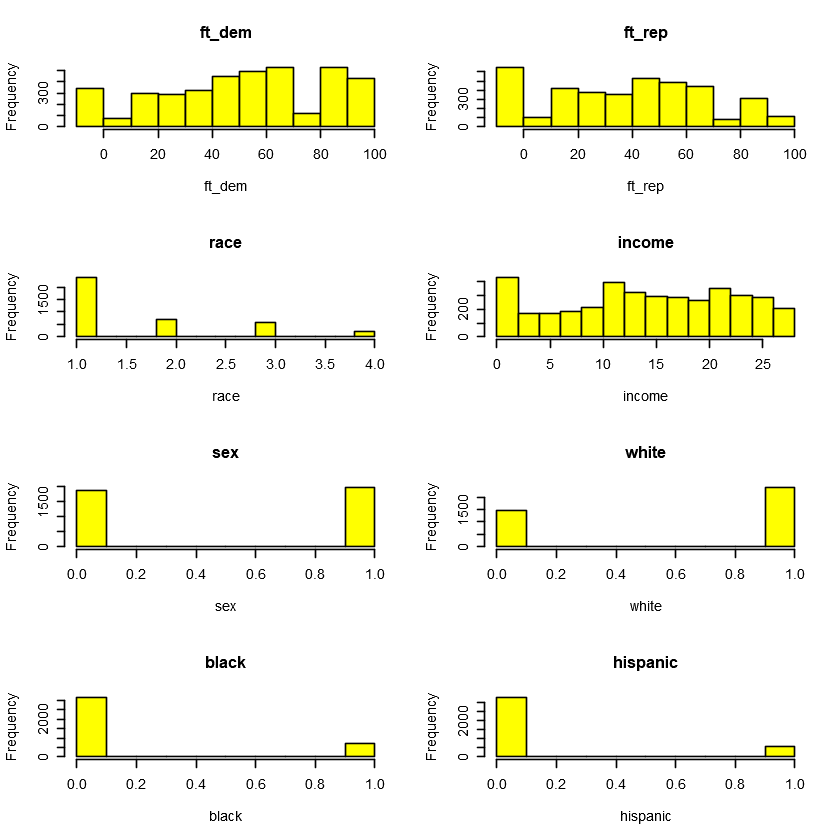

In [22]:
par(mfrow = c(4,2))
for(i in 1:8) {
    hist(elec[,i], main = colnames(elec)[i], xlab = colnames(elec)[i], col = 'yellow')
}  

In [23]:
str(elec)

'data.frame':	3870 obs. of  10 variables:
 $ ft_dem    : int  100 100 70 100 50 30 70 0 15 85 ...
 $ ft_rep    : int  0 85 40 15 60 15 30 60 40 30 ...
 $ race      : int  2 2 2 2 1 1 1 1 1 1 ...
 $ income    : int  3 2 13 1 9 27 24 25 26 7 ...
 $ sex       : int  1 1 0 1 0 0 1 1 0 1 ...
 $ white     : int  0 0 0 0 1 1 1 1 1 1 ...
 $ black     : int  1 1 1 1 0 0 0 0 0 0 ...
 $ hispanic  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ other     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ vote_obama: int  1 1 1 1 0 0 1 0 0 1 ...


In [7]:
Model1 <- glm(vote_obama ~ ft_dem + ft_rep
          + black + hispanic + other
          + income,
          family=binomial(link=logit))

ERROR: Error in eval(predvars, data, env): object 'vote_obama' not found


In [25]:
summary(Model1)


Call:
glm(formula = vote_obama ~ ft_dem + ft_rep + black + hispanic + 
    other + income, family = binomial(link = logit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2260  -0.1350   0.0140   0.1639   4.1982  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.223619   0.253391  -0.883   0.3775    
ft_dem       0.093786   0.004278  21.923  < 2e-16 ***
ft_rep      -0.090827   0.004182 -21.716  < 2e-16 ***
black        3.165810   0.394835   8.018 1.07e-15 ***
hispanic     0.969995   0.189366   5.122 3.02e-07 ***
other        0.558628   0.254384   2.196   0.0281 *  
income      -0.025063   0.008530  -2.938   0.0033 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5247.0  on 3869  degrees of freedom
Residual deviance: 1467.8  on 3863  degrees of freedom
AIC: 1481.8

Number of Fisher Scoring iterations: 8


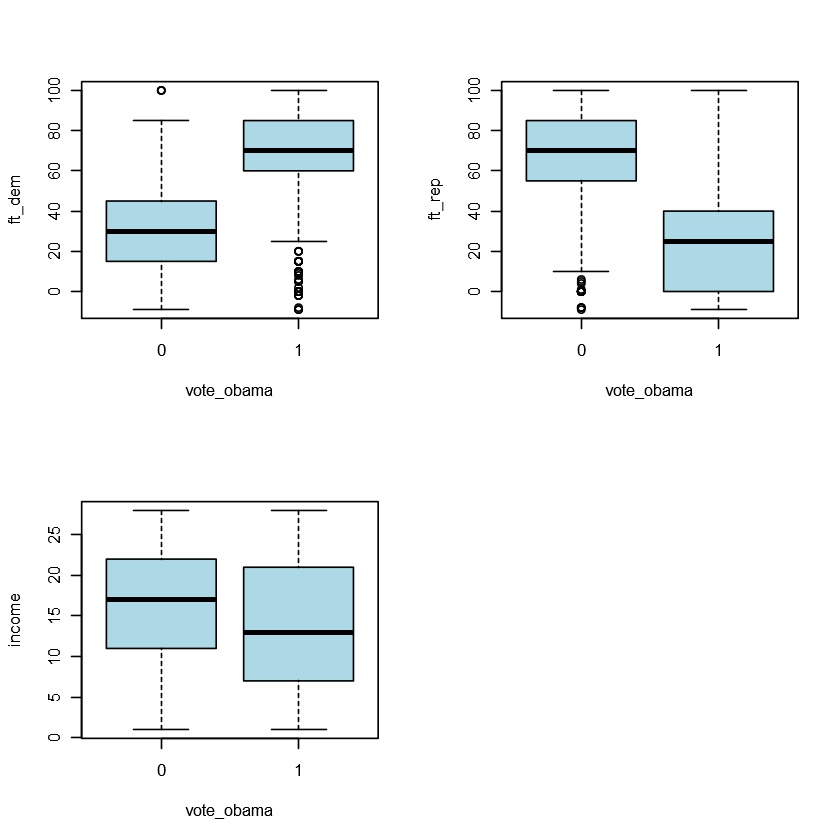

In [29]:
par(mfrow = c(2,2))
boxplot(ft_dem~vote_obama, ylab="ft_dem", xlab= "vote_obama", col="light blue",data = elec)
boxplot(ft_rep~vote_obama, ylab="ft_rep", xlab= "vote_obama", col="light blue",data = elec)
# boxplot(black~vote_obama, ylab="black", xlab= "vote_obama", col="light blue",data = elec)
# boxplot(hispanic~vote_obama, ylab="hispanic", xlab= "vote_obama", col="light blue",data = elec)
# boxplot(other~vote_obama, ylab="other", xlab= "vote_obama", col="light blue",data = elec)
boxplot(income~vote_obama, ylab="income", xlab= "vote_obama", col="light blue",data = elec)

In [33]:
round(exp(coef(Model1)), digits = 3)

(Intercept)      ft_dem      ft_rep       black    hispanic       other 
      0.800       1.098       0.913      23.708       2.638       1.748 
     income 
      0.975

In [38]:
Model_2 <- stepAIC(Model1)

Start:  AIC=1481.76
vote_obama ~ ft_dem + ft_rep + black + hispanic + other + income

           Df Deviance    AIC
<none>          1467.8 1481.8
- other     1   1472.6 1484.6
- income    1   1476.5 1488.5
- hispanic  1   1495.0 1507.0
- black     1   1585.1 1597.1
- ft_rep    1   2363.2 2375.2
- ft_dem    1   2414.8 2426.8


In [40]:
summary(Model_2)


Call:
glm(formula = vote_obama ~ ft_dem + ft_rep + black + hispanic + 
    other + income, family = binomial(link = logit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2260  -0.1350   0.0140   0.1639   4.1982  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.223619   0.253391  -0.883   0.3775    
ft_dem       0.093786   0.004278  21.923  < 2e-16 ***
ft_rep      -0.090827   0.004182 -21.716  < 2e-16 ***
black        3.165810   0.394835   8.018 1.07e-15 ***
hispanic     0.969995   0.189366   5.122 3.02e-07 ***
other        0.558628   0.254384   2.196   0.0281 *  
income      -0.025063   0.008530  -2.938   0.0033 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5247.0  on 3869  degrees of freedom
Residual deviance: 1467.8  on 3863  degrees of freedom
AIC: 1481.8

Number of Fisher Scoring iterations: 8


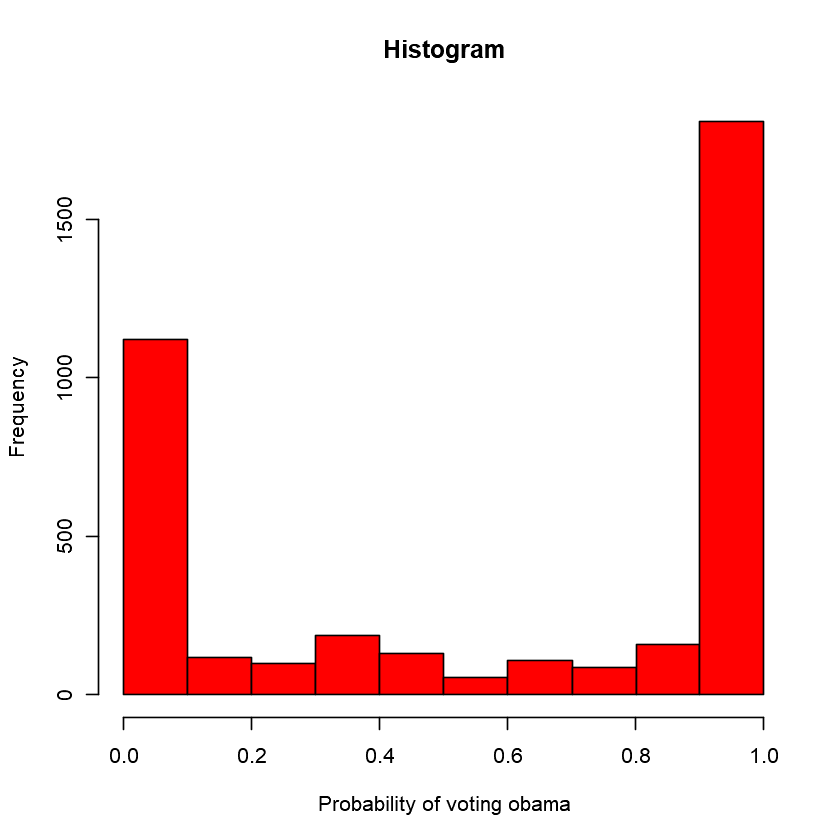

In [41]:
hist(Model_2$fitted.values,main = " Histogram ",xlab = "Probability of voting obama", col = 'red')

In [42]:
Model_2$aic

[1] 1481.759

In [43]:
Model1$aic

[1] 1481.759

In [46]:
elec$Predict <- ifelse(Model_2$fitted.values >0.5,"Votes Obama","Does Not votes Obama")

In [54]:
# Confusion matrix

mytable <- table(elec$vote_obama,elec$Predict)
rownames(mytable) <- c("Obseved Negative","Observed Positive")
colnames(mytable) <- c("Predicted Negative","Predicted Positive")
mytable

                   
                    Predicted Negative Predicted Positive
  Obseved Negative                1485                113
  Observed Positive                170               2102

In [48]:
efficiency <- sum(diag(mytable))/sum(mytable)
efficiency

[1] 0.9268734

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.formula(formula = vote_obama ~ Model_2$fitted.values, data = elec,     plot = TRUE, main = "ROC CURVE", col = "blue")

Data: Model_2$fitted.values in 1598 controls (vote_obama 0) < 2272 cases (vote_obama 1).
Area under the curve: 0.9776

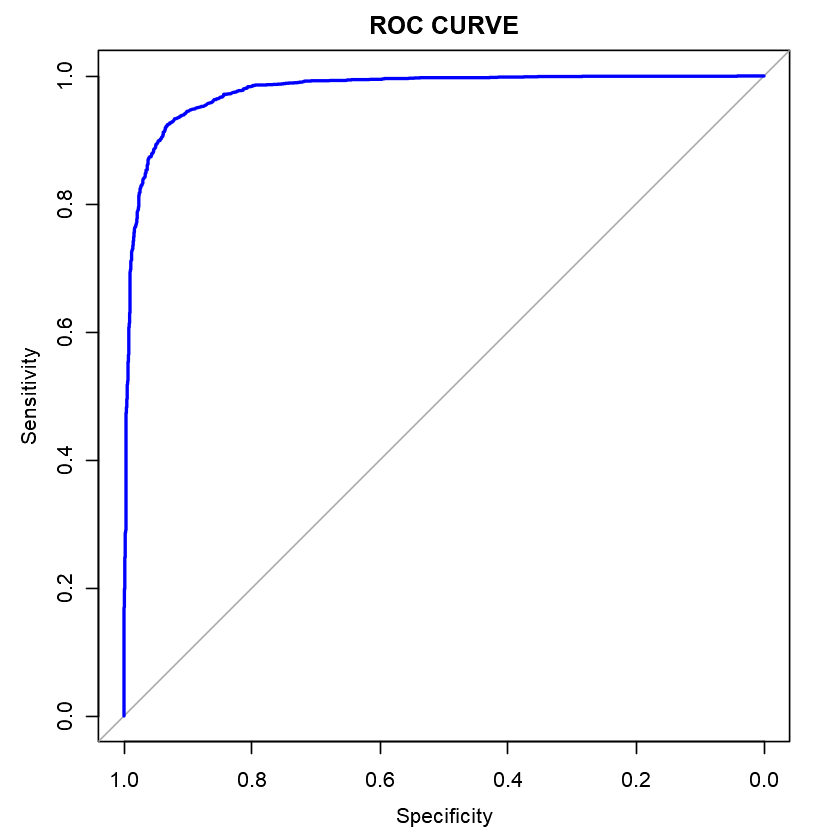

In [50]:
roc(vote_obama~Model_2$fitted.values, data = elec, plot = TRUE, main = "ROC CURVE", col= "blue")

In [53]:
auc(vote_obama~Model_2$fitted.values, data = elec)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9776

In [77]:
hl <- hoslem.test(elec$vote_obama, fitted(Model1), g = 10)

In [73]:
hl


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  elec$vote_obama, fitted(Model_2)
X-squared = 144.67, df = 8, p-value < 2.2e-16


In [76]:
for (i in 5:15) {
	print(hoslem.test(Model1$vote_obama, fitted(Model1), g=i)$p.value)
}

ERROR: Error in model.frame.default(formula = cbind(y0 = 1 - y, y1 = y) ~ cutyhat): variable lengths differ (found for 'cutyhat')
